In [136]:
%matplotlib inline
import pandas as pd

In [137]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [138]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,8,2007
1,Romans,2016
2,Ultra-Toxic,2005
3,The Candy Man,1969
4,Friends & Lovers: The Ski Trip 2,2008


In [139]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


### What are the ten most common movie names of all time?

In [140]:
x=cast.groupby(['title','year']).count()
x=x.reset_index()
x.groupby('title').count().sort_values('year',ascending=False).head(10)

,year,name,type,character,n
title,,,,,
Hamlet,17,17,17,17,17
Macbeth,15,15,15,15,15
Carmen,13,13,13,13,13
Maya,11,11,11,11,11
The Outsider,11,11,11,11,11
Temptation,10,10,10,10,10
Othello,10,10,10,10,10
She,10,10,10,10,10
Vengeance,10,10,10,10,10


In [141]:
x=cast.groupby(['title','year']).count()
x=x.reset_index()
x.groupby('title').size().sort_values(ascending=False).head(10)

title
Hamlet           17
Macbeth          15
Carmen           13
Maya             11
The Outsider     11
She              10
Temptation       10
Vengeance        10
Anna Karenina    10
Othello          10
dtype: int64

### Which three years of the 1930s saw the most films released?

In [142]:
cast['decade']=cast.year//10*10
x=cast[cast.decade==1930].groupby(['title','year']).count()
x=x.reset_index()
x.groupby('year').size().sort_values(ascending=False).head(3)

year
1937    1050
1936    1038
1938     970
dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

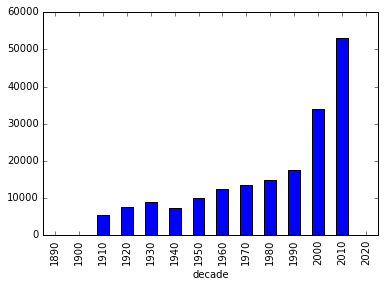

In [143]:
x=cast.groupby(['title','year','decade']).count()
x=x.reset_index()
x=x.groupby('decade').size()
x.plot(kind='bar')

### Plot the number of "Hamlet" films made each decade.

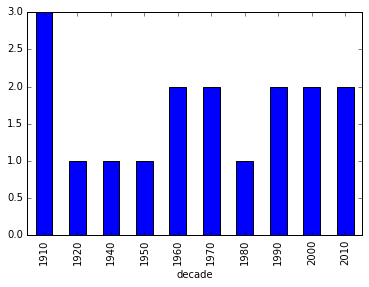

In [164]:
x=cast.groupby(['title','decade','year']).count()
x=x.ix['Hamlet'].reset_index()
x=x.groupby('decade').size()
x.plot(kind='bar')


### Plot the number of "Rustler" characters in each decade of the history of film.

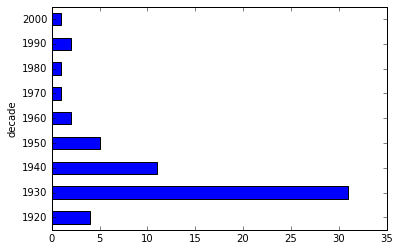

In [179]:
x=cast[cast.character=='Rustler'].groupby(['title','year','decade']).size()
x=x.reset_index()
x=x.groupby('decade').size()
x.plot(kind='barh')

### Plot the number of "Hamlet" characters each decade.

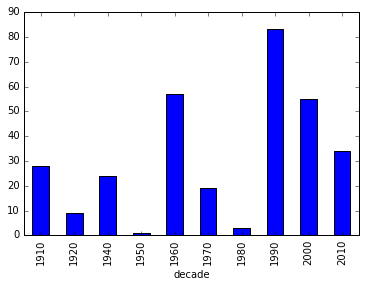

In [196]:
x=cast[cast.title=="Hamlet"].groupby(['decade']).size()
x.plot(kind='bar')

### What are the 11 most common character names in movie history?

In [198]:
cast.groupby(['character']).size().sort_values(ascending=False).head(11)

character
Himself        19362
Dancer         11850
Extra          10690
Reporter        8046
Doctor          7321
Student         6929
Policeman       6801
Party Guest     6644
Nurse           6529
Bartender       6501
Minor Role      6172
dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [206]:
cast[cast.character=='Herself'].dropna().groupby(['name']).size().sort_values(ascending=False).head(10)

name
Joyce Brothers         14
Robin (II) Roberts      3
Leeza Gibbons           3
Sally Jessy Raphael     3
Whoopi Goldberg         3
Camille Paglia          3
Katrina Kaif            3
Celia Cruz              3
Roma Torre              3
Caroline Munro          3
dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [207]:
cast[cast.character=='Himself'].dropna().groupby(['name']).size().sort_values(ascending=False).head(10)

name
Ron Jeremy                   17
Kurt Loder                    9
Shaquille O'Neal              8
Bob Costas                    7
The Bishop Don Magic Juan     6
Joe Franklin                  6
Alex Trebek                   6
Billy Graham                  6
Dick Vitale                   6
Ed Koch                       6
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [216]:
cast[cast.year==1945].groupby('name').size().sort_values(ascending=False).head(1)

name
Emmett Vogan    39
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [217]:
cast[cast.year==1985].groupby('name').size().sort_values(ascending=False).head(1)

name
Mammootty    21
dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

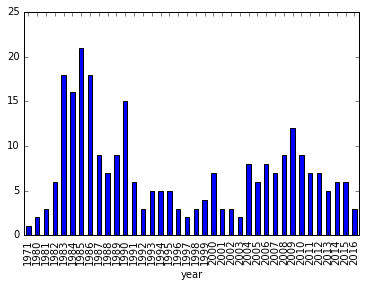

In [225]:
x=cast[cast.name=='Mammootty'].groupby('year').size()
x.plot(kind='bar')

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [240]:
cast[cast.character.str.startswith('Patron in')].groupby('character').size().sort_values(ascending=False).head(10)

character
Patron in Frisky Rabbit         16
Patron in the Coffee House       9
Patron in Chinese Restaurant     9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in Club                   3
Patron in restaurant             3
Patron in cabaret                3
Patron in Restaurant             3
Patron in Quiet Bar              2
dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [241]:
cast[cast.character.str.startswith('Science')].groupby('character').size().sort_values(ascending=False).head(10)

character
Science Teacher         57
Science Fair Student     9
Science Student          9
Science Club Member      5
Science Fair Judge       5
Science Kid              5
Science Promo Cadet      5
Science Reporter         5
Science teacher          3
Science Fair Kid         3
dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e579a9978>], dtype=object)

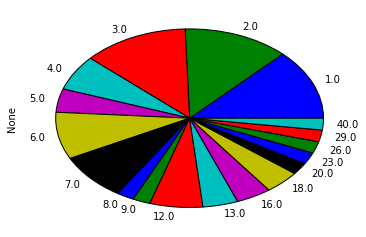

In [246]:
x=cast[cast.name=="Judi Dench"].groupby(['n']).size()
x.plot(kind='pie',subplots=True)

### Plot the n-values of Cary Grant's roles through his career.

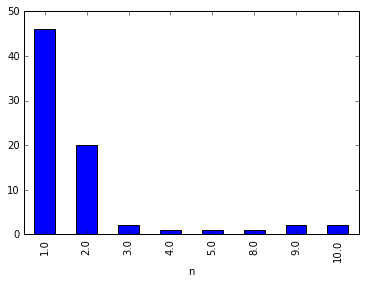

In [250]:
x=cast[cast.name=="Cary Grant"].groupby(['n']).size()
x.plot(kind='bar')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

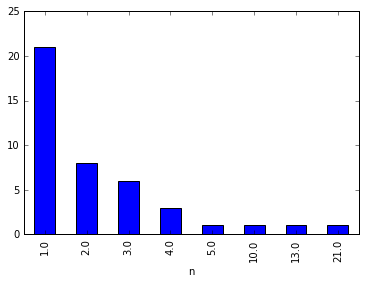

In [251]:
x=cast[cast.name=="Sidney Poitier"].groupby(['n']).size()
x.plot(kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [254]:
cast[(cast.decade==1950)&(cast.n==1)].groupby('type').size()

type
actor      6563
actress    2940
dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [255]:
cast[(cast.decade==1950)&(cast.n==2)].groupby('type').size()

type
actor      4530
actress    4519
dtype: int64